## Get Match list of a player, and analyze the information
First we need to find the player's id, it would be fun to look for status of professional players (and they definitely have more data than other players). I get those usernames from [OP.GG](http://na.op.gg/spectate/list/)  
Let's use **Doublelift** as an example in this script!  
PS: [full API documentation](https://developer.riotgames.com/api/methods)

In [1]:
from lolcrawler_util import read_key, get_summoner_info

api_key = read_key()
name = 'Doublelift'
summoner = get_summoner_info(api_key, name)
usr_id = summoner[name.lower()]['id']
print usr_id

20132258


Ok, we get his id now, now we have to get his match history. Let's find all his matches in 2016 season and team builder draft 5v5 rank queue.

In [2]:
from lolcrawler_util import get_matchlist_by_summoner
matchlist = get_matchlist_by_summoner(usr_id, api_key, rankedQueues='TEAM_BUILDER_DRAFT_RANKED_5x5',
                                      seasons='SEASON2016')
print len(matchlist['matches'])

381


381 games, that almost the total number of games I've played in NA server. Then let's try to analyze those matches.  
First take a look of what role he likes to play the most.

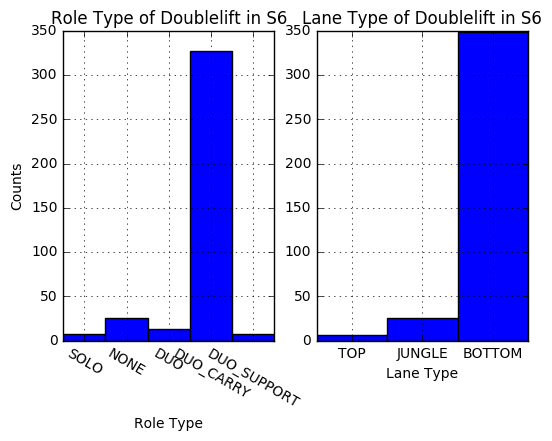

In [4]:
%matplotlib inline
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

role_cnt = Counter()
lane_cnt = Counter()
for match in matchlist['matches']:
    role_cnt[match['role']] += 1
    lane_cnt[match['lane']] += 1

fig = plt.figure()
ax1 = fig.add_subplot(121)
indexes = np.arange(len(role_cnt.keys()))
width = 1
ax1.bar(indexes, role_cnt.values(), width)
plt.xticks(indexes + width * 0.5, role_cnt.keys(), rotation=-30)
plt.xlabel('Role Type')
plt.ylabel('Counts')
plt.title('Role Type of Doublelift in S6')
plt.grid(True)

ax2 = fig.add_subplot(122)
indexes = np.arange(len(lane_cnt.keys()))
width = 1
ax2.bar(indexes, lane_cnt.values(), width)
plt.xticks(indexes + width * 0.5, lane_cnt.keys())
plt.xlabel('Lane Type')
plt.title('Lane Type of Doublelift in S6')
plt.grid(True)
plt.show()

Ok, he likes to play ad carry in bottom lane. Just as expected.  
Now comes the analysis, because he is a ADC player, let's just focus on matches he played ADC. The matches and corresponding information were crawled and saved in \data folder by script [GetPlayerMatchHistoryInfo.py](https://github.com/qingshuimonk/LolStats/blob/master/GetPlayerMatchHistoryInfo.py). For comparison, I also crawled Pray's data in 2016 season (I know he is from another region, but he has a similarly amount of data)

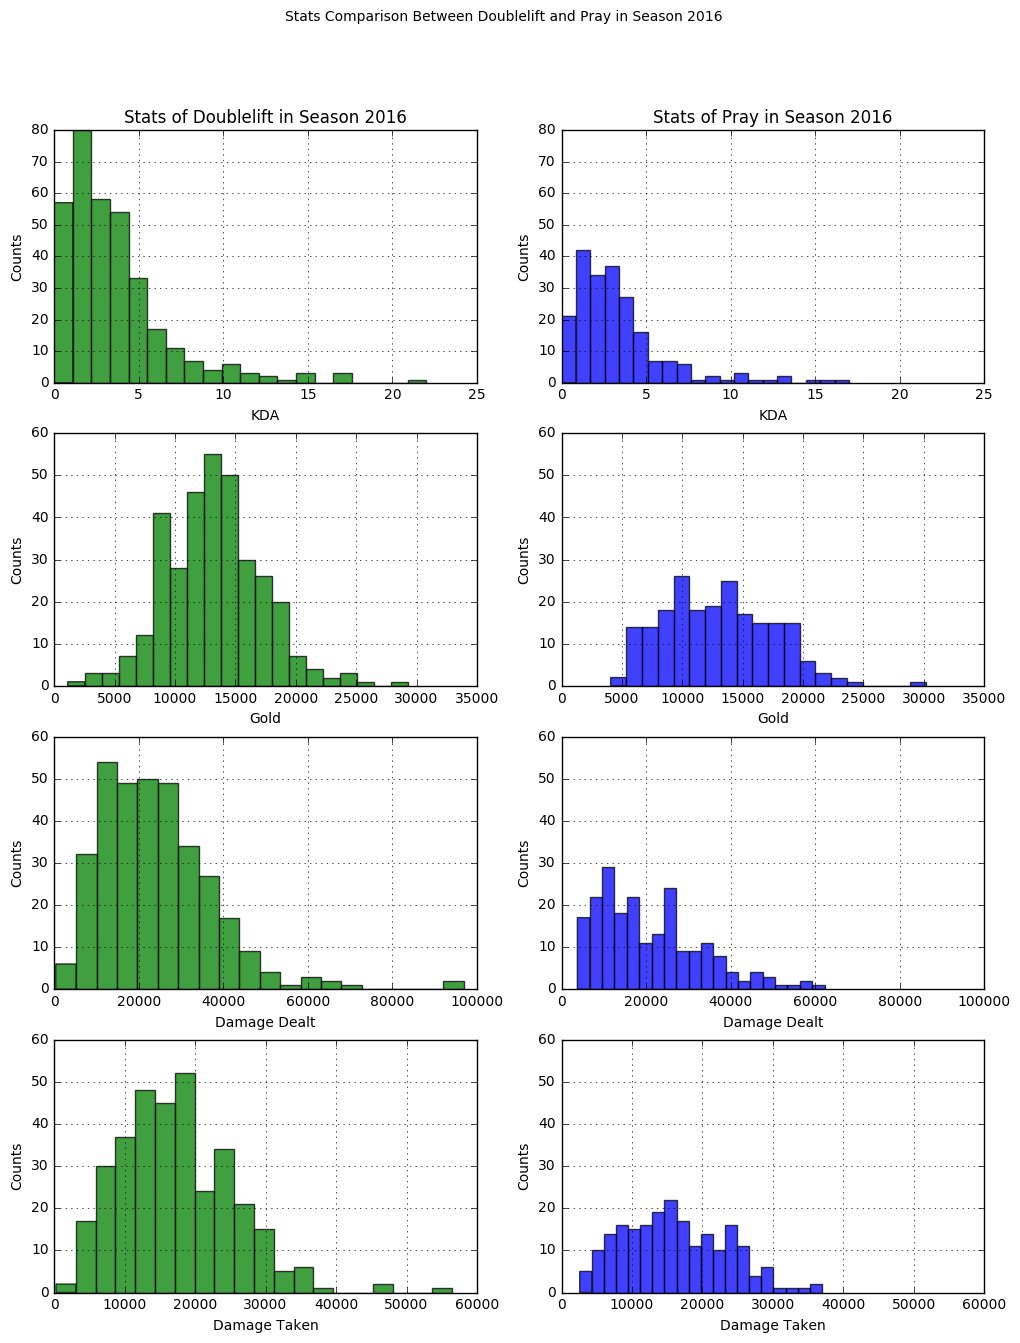

In [6]:
import os
import pickle
path = os.path.join(os.path.dirname('getMatchList.ipynb'), 'data')
f = open(os.path.join(path, 'Doublelift_TEAM_BUILDER_DRAFT_RANKED_5x5_SEASON2016.pickle'), 'r')
doublelift_history = pickle.load(f)
f.close()

path = os.path.join(os.path.dirname('getMatchList.ipynb'), 'data')
f = open(os.path.join(path, 'PraY8D_TEAM_BUILDER_DRAFT_RANKED_5x5_SEASON2016.pickle'), 'r')
pray_history = pickle.load(f)
f.close()

fig = plt.figure(figsize=(12, 15))
ax1 = fig.add_subplot(421)
kda = np.divide(np.array(doublelift_history.kill, dtype=np.float32) +
                np.array(doublelift_history.assist, dtype=np.float32),
                (np.array(doublelift_history.death, dtype=np.float32)+1))
n, bins, patches = plt.hist(kda, 20, facecolor='green', alpha=0.75)
plt.xlabel('KDA')
plt.ylabel('Counts')
plt.title('Stats of Doublelift in Season 2016')
plt.axis([0, 25, 0, 80])
plt.grid(True)

ax2 = fig.add_subplot(423)
n, bins, patches = plt.hist(doublelift_history.gold, 20, facecolor='green', alpha=0.75)
plt.xlabel('Gold')
plt.ylabel('Counts')
plt.axis([0, 35000, 0, 60])
plt.grid(True)

ax3 = fig.add_subplot(425)
n, bins, patches = plt.hist(doublelift_history.damage, 20, facecolor='green', alpha=0.75)
plt.xlabel('Damage Dealt')
plt.ylabel('Counts')
plt.axis([0, 100000, 0, 60])
plt.grid(True)

ax4 = fig.add_subplot(427)
n, bins, patches = plt.hist(doublelift_history.damage_taken, 20, facecolor='green', alpha=0.75)
plt.xlabel('Damage Taken')
plt.ylabel('Counts')
plt.axis([0, 60000, 0, 60])
plt.grid(True)

ax1 = fig.add_subplot(422)
kda = np.divide(np.array(pray_history.kill, dtype=np.float32)+
                np.array(pray_history.assist, dtype=np.float32),
                (np.array(pray_history.death, dtype=np.float32)+1))
n, bins, patches = plt.hist(kda, 20, facecolor='blue', alpha=0.75)
plt.xlabel('KDA')
plt.ylabel('Counts')
plt.title('Stats of Pray in Season 2016')
plt.axis([0, 25, 0, 80])
plt.grid(True)

ax2 = fig.add_subplot(424)
n, bins, patches = plt.hist(pray_history.gold, 20, facecolor='blue', alpha=0.75)
plt.xlabel('Gold')
plt.ylabel('Counts')
plt.axis([0, 35000, 0, 60])
plt.grid(True)

ax3 = fig.add_subplot(426)
n, bins, patches = plt.hist(pray_history.damage, 20, facecolor='blue', alpha=0.75)
plt.xlabel('Damage Dealt')
plt.ylabel('Counts')
plt.axis([0, 100000, 0, 60])
plt.grid(True)

ax4 = fig.add_subplot(428)
n, bins, patches = plt.hist(pray_history.damage_taken, 20, facecolor='blue', alpha=0.75)
plt.xlabel('Damage Taken')
plt.ylabel('Counts')
plt.axis([0, 60000, 0, 60])
plt.grid(True)

plt.suptitle('Stats Comparison Between Doublelift and Pray in Season 2016')
plt.show()

Hmm... Looks pretty!  
Doublelift have almost 100 more games played than pray so he seems to have a higher peak. But they both share similar shape of histogram. However, the only difference is Doublelift's gold histogram is more like a triangle while it is more uniform for Pray's.  
Now how about damage to gold? We all this is a critical criteria for ADC player.

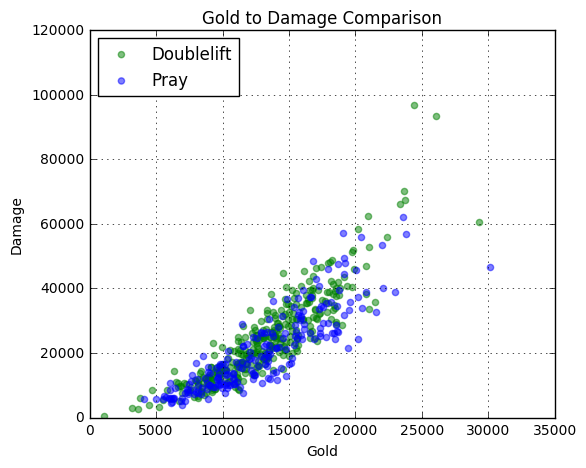

In [12]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
sc1 = plt.scatter(doublelift_history.gold, doublelift_history.damage, alpha=0.5, color='green')
sc2 = plt.scatter(pray_history.gold, pray_history.damage, alpha=0.5, color='blue')
plt.xlabel('Gold')
plt.ylabel('Damage')
plt.title('Gold to Damage Comparison')
plt.legend((sc1, sc2), ('Doublelift', 'Pray'), scatterpoints=1, loc='upper left')
plt.grid(True)
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
plt.show()

It might not be very obvious, but indeed Doublelift is slightly better in transforming gold to damage given the plot.